# ALASKA2 Image Steganalysis

<b>What is steganography?</b> <br><i>Steganography is the practice of concealing a file, message, image, or video within another file, message, image, or video.</i><br><HR>
<p>To understand steganography we need to understand the way that digital images work.Digital image consist of pixels.Pixels are the sample of original Images.More pixels more accurate the image.Every pixels store in 8bits format .For example :Let consider RGB image  has RGB(218,150,149) value and store in 8 bits format like :R=11011010 ,G=10010110,B=10010101.Rightmost bit is the most significant bit and the leftmost bit is the least significant bit .Least significant bit open gate for the steganography .Most significant bit are taken from the image and least significant bit are change with the encrypted data.</p>
<p>In this problem,Steganography are not on pixels of images.

<b>Data</b> :<p> Dataset contains a large number of unaltered images, called the "Cover" image, as well as corresponding examples in which information has been hidden using one of three steganography algorithms (JMiPOD, JUNIWARD, UERD). The goal of the competition is to determine which of the images in the test set (Test/) have hidden messages embedded.


<b >Note</b>:
<ul>
<li>Each embedding algorithm is used with the same probability.
<li>The payload (message length) is adjusted such that the "difficulty" is approximately the same regardless the content of the image. Images with smooth content are used to hide shorter messages while highly textured images will be used to hide more secret bits. The payload is adjusted in the same manner for testing and training sets.
<li>The average message length is 0.4 bit per non-zero AC DCT coefficient.
<li>The images are all compressed with one of the three following JPEG quality factors: 95, 90 or 75.
</ul>

<b >Files</b>:
<ul>
    <li>Cover/ contains 75k unaltered images meant for use in training.
<li>JMiPOD/ contains 75k examples of the JMiPOD algorithm applied to the cover images.
<li>JUNIWARD/contains 75k examples of the JUNIWARD algorithm applied to the cover images.
<li>UERD/ contains 75k examples of the UERD algorithm applied to the cover images.
<li>Test/ contains 5k test set images. These are the images for which you are predicting.



<h2> Metric:</h2><br>
<h3>Weighted AUC</h3><br>
    <p>In order to focus on reliable detection with an emphasis on low false-alarm rate, metric are used here is weighted AUC. To calculate the weighted AUC, each region of the ROC curve is weighted according to these chosen parameters:
<br>
tpr_thresholds = [0.0, 0.4, 1.0]<br>
weights = [2, 1]
<br>
In other words, the area between the true positive rate of 0 and 0.4 is weighted 2X, the area between 0.4 and 1 is now weighed (1X). The total area is normalized by the sum of weights such that the final weighted AUC is between 0 and 1.


# Exploratory Data Analysis

In [ ]:
#Load requirement library 
#Import some images for analysis
import skimage as skimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from skimage.io import imread, imshow
from skimage.color import rgb2hsv,rgb2ycbcr,rgb2gray
import matplotlib.pyplot as plt
import cv2
import numpy as np # linear algebra
import pandas as pd 
import jpegio as jio
import tensorflow.keras as keras
import tensorflow_addons as tfa
%matplotlib inline


## Read Images.

In [ ]:

cover_img = imread('/kaggle/input/alaska2-image-steganalysis/Cover/00021.jpg', as_gray=False)
jmipod_img = imread('/kaggle/input/alaska2-image-steganalysis/JMiPOD/00021.jpg', as_gray=False)
juniward_img = imread('/kaggle/input/alaska2-image-steganalysis/JUNIWARD/00021.jpg', as_gray=False)
uerd_img = imread('/kaggle/input/alaska2-image-steganalysis/UERD/00021.jpg', as_gray=False)




## Visualize Images with RGB and HSV Color spaces

By visualizing images with different color space try to find some difference.

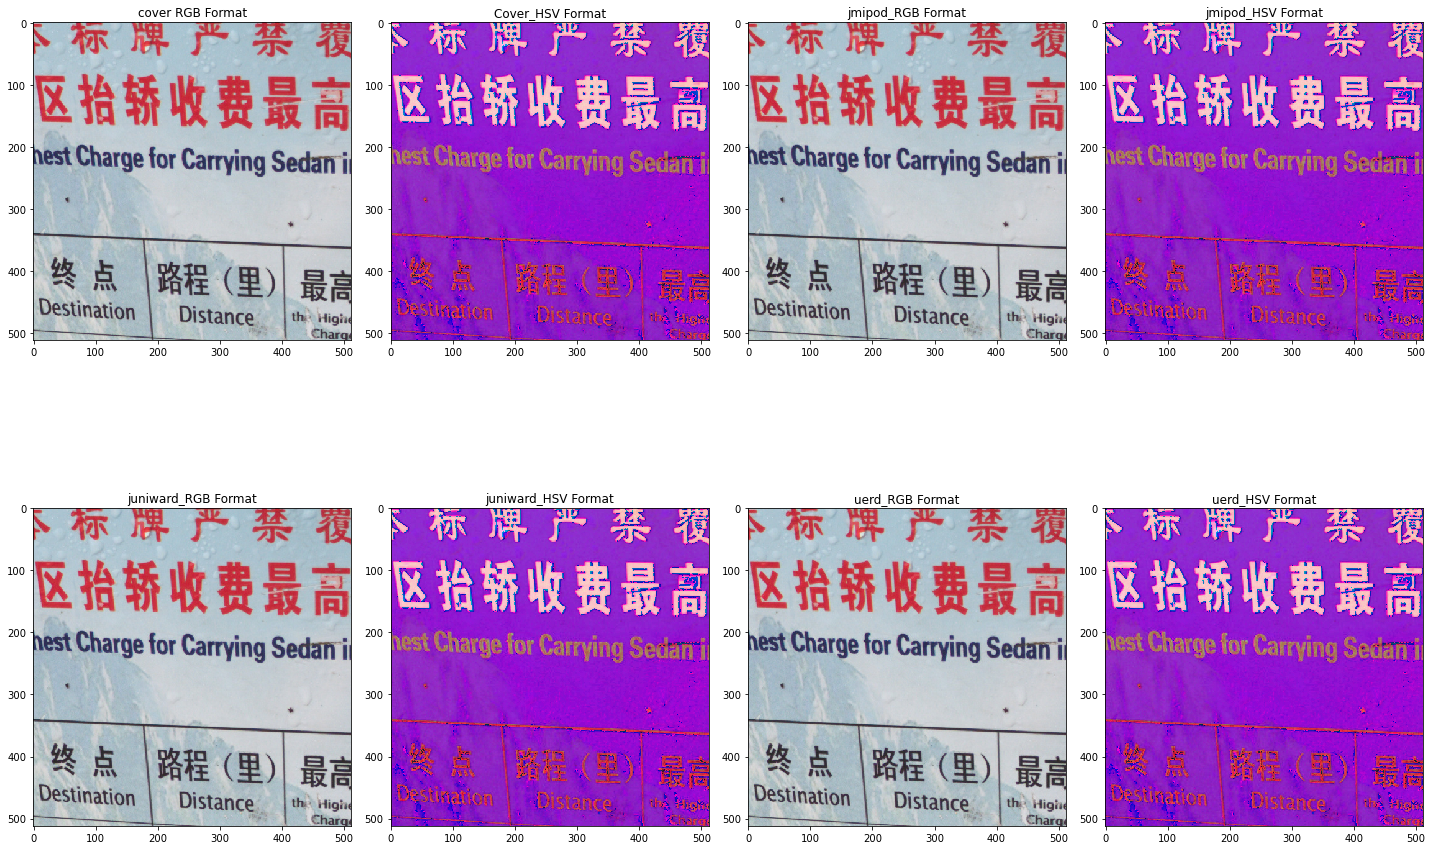

In [ ]:
# Try to visualize the different images with different steganoimages
# Visualize the Rgb and hsv color space .Trying to find some different in the images by visualization.
fig,ax = plt.subplots(2,4,figsize=(20,20))

imshow(cover_img,ax=ax[0,0])
ax[0,0].set_title('cover RGB Format')
img_new=rgb2hsv(cover_img)
imshow(img_new,ax=ax[0,1])
ax[0,1].set_title('Cover_HSV Format')

imshow(jmipod_img,ax=ax[0,2])
ax[0,2].set_title('jmipod_RGB Format') 

img_new=rgb2hsv(jmipod_img)
imshow(img_new,ax=ax[0,3])
ax[0,3].set_title('jmipod_HSV Format')

imshow(juniward_img,ax=ax[1,0])
ax[1,0].set_title('juniward_RGB Format') 

img_new=rgb2hsv(juniward_img)
imshow(img_new,ax=ax[1,1])
ax[1,1].set_title('juniward_HSV Format')
imshow(uerd_img,ax=ax[1,2])
ax[1,2].set_title('uerd_RGB Format') 

img_new=rgb2hsv(uerd_img)
imshow(img_new,ax=ax[1,3])
ax[1,3].set_title('uerd_HSV Format')
plt.show()


By Visualizing the images,there is no difference in the images.All the color spaces with different algorithms seems similiar.

Let's try to subtract the stegano images with cover images to find,Is there any difference in images pixels.

Text(0.5, 1.0, 'Cover-uerd Format')

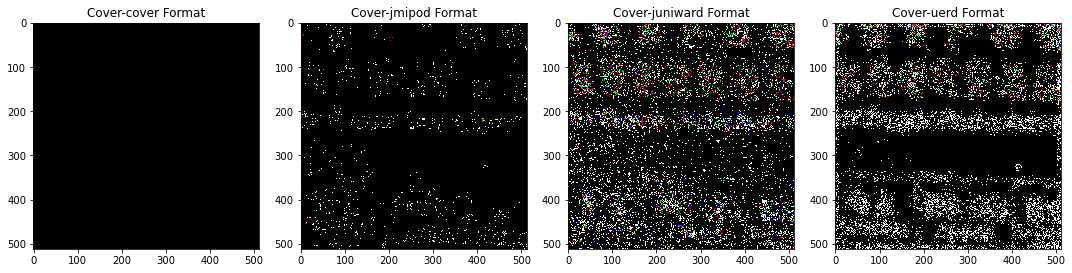

In [ ]:
#Trying to find some different between original and other stegano images
#Images are in rgb format 
f, axs = plt.subplots(2,2,figsize=(15,15))
plt.subplot(141), imshow(cover_img-cover_img)
plt.title('Cover-cover Format') 
plt.subplot(142), imshow(cover_img-jmipod_img)
plt.title('Cover-jmipod Format') 

plt.subplot(143), imshow(cover_img-juniward_img)
plt.title('Cover-juniward Format') 

plt.subplot(144), imshow(cover_img-uerd_img)
plt.title('Cover-uerd Format') 



By this analysis: Images have some difference in there pixel.we also find that the steganed messages are not centered at some place of image they are distributed all over the image uniformly. Juniward adn Uerd algorithms seems similiar than Jmipod algorithms.

Let's try above ananlysis with different images.

Text(0.5, 1.0, 'Original Cover Format')

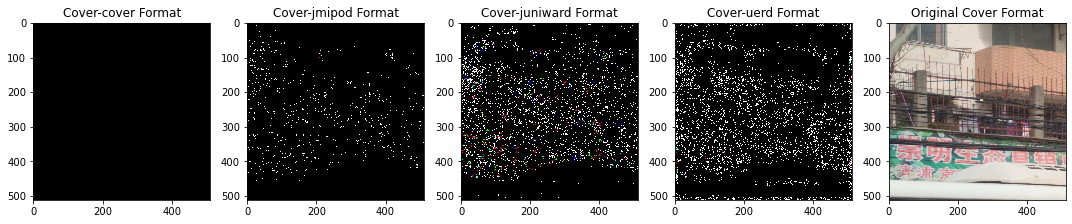

In [ ]:
#Try previous analysis on different images
#Images are in rgb format
cover_img = imread('/kaggle/input/alaska2-image-steganalysis/Cover/00015.jpg', as_gray=False)
jmipod_img = imread('/kaggle/input/alaska2-image-steganalysis/JMiPOD/00015.jpg', as_gray=False)
juniward_img = imread('/kaggle/input/alaska2-image-steganalysis/JUNIWARD/00015.jpg', as_gray=False)
uerd_img = imread('/kaggle/input/alaska2-image-steganalysis/UERD/00015.jpg', as_gray=False)

f, axs = plt.subplots(1,5,figsize=(15,15))
plt.subplot(151), imshow(cover_img-cover_img)
plt.title('Cover-cover Format') 
plt.subplot(152), imshow(cover_img-jmipod_img)
plt.title('Cover-jmipod Format') 

plt.subplot(153), imshow(cover_img-juniward_img)
plt.title('Cover-juniward Format') 

plt.subplot(154), imshow(cover_img-uerd_img)
plt.title('Cover-uerd Format') 
plt.subplot(155), imshow(cover_img)
plt.title('Original Cover Format')


By analysis : Juniward and uerd algorithms work similiar than the jmipod.Most darker color or pixel contain the messages.

Let try to find,Is there is any differences in the image colorwise.Example=Red_cover-Red_jmirod

Text(0.5, 1.0, 'Cover-uerd Green color Format')

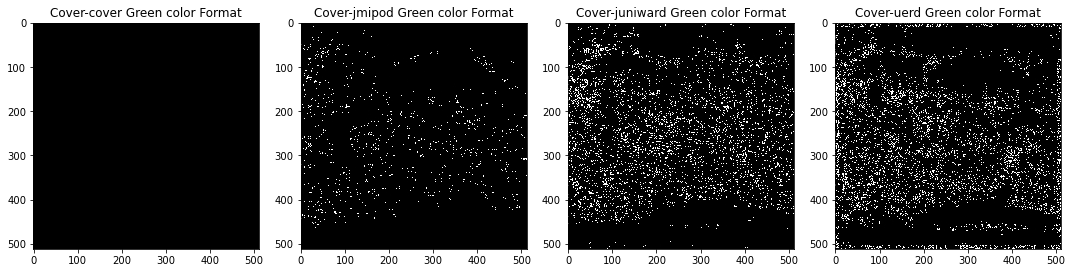

In [ ]:
#Color space subtracted from stegano images with original images
#Original image is the previous cell images
#Green color is choosen here
f, axs = plt.subplots(2,2,figsize=(15,15))
plt.subplot(141), imshow(cover_img[:,:,1]-cover_img[:,:,1])
plt.title('Cover-cover Green color Format') 
plt.subplot(142), imshow(cover_img[:,:,1]-jmipod_img[:,:,1])
plt.title('Cover-jmipod Green color Format') 

plt.subplot(143), imshow(cover_img[:,:,1]-juniward_img[:,:,1])
plt.title('Cover-juniward Green color Format') 

plt.subplot(144), imshow(cover_img[:,:,1]-uerd_img[:,:,1])
plt.title('Cover-uerd Green color Format') 


There is not much difference in the color spaces also .Let try with different color .

Text(0.5, 1.0, 'Cover-uerd Blue color Format')

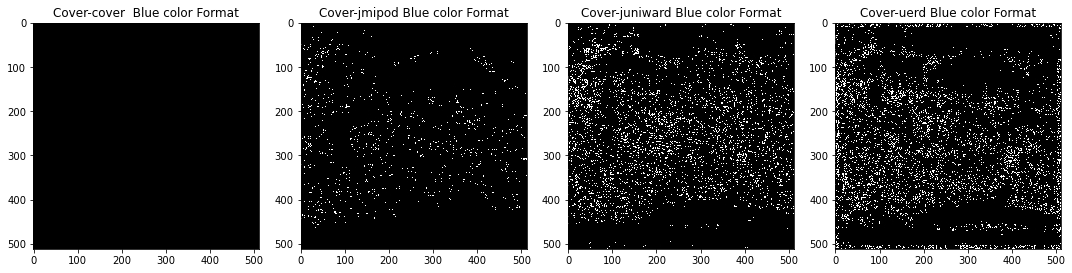

In [ ]:
#Blue color is select 
f, axs = plt.subplots(2,2,figsize=(15,15))
plt.subplot(141), imshow(cover_img[:,:,2]-cover_img[:,:,2])
plt.title('Cover-cover  Blue color Format') 
plt.subplot(142), imshow(cover_img[:,:,2]-jmipod_img[:,:,2])
plt.title('Cover-jmipod Blue color Format') 

plt.subplot(143), imshow(cover_img[:,:,2]-juniward_img[:,:,2])
plt.title('Cover-juniward Blue color Format') 

plt.subplot(144), imshow(cover_img[:,:,2]-uerd_img[:,:,2])
plt.title('Cover-uerd Blue color Format') 


Similiar type of behaviour is seen with blue color also .Let try with red color

Text(0.5, 1.0, 'Cover-uerd Red color Format')

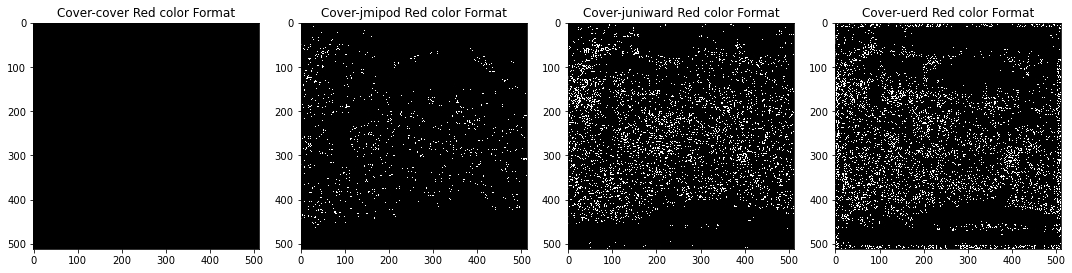

In [ ]:
#Red Color space
f, axs = plt.subplots(2,2,figsize=(15,15))
plt.subplot(141), imshow(cover_img[:,:,0]-cover_img[:,:,0])
plt.title('Cover-cover Red color Format') 
plt.subplot(142), imshow(cover_img[:,:,0]-jmipod_img[:,:,0])
plt.title('Cover-jmipod Red color Format') 

plt.subplot(143), imshow(cover_img[:,:,0]-juniward_img[:,:,0])
plt.title('Cover-juniward Red color Format') 

plt.subplot(144), imshow(cover_img[:,:,0]-uerd_img[:,:,0])
plt.title('Cover-uerd Red color Format') 


## <h10> **Conclusion** 
Analysis done on RGB color space.From above analysis.We show that steaganography algorithms distribute message uniformly in every color spaces and not positioned.

---------------------------------------------------------------
We try here the RGB color space let try with different color space YCbCr .

## YCbCr color space Analysis

Below function is used to read jpeg images in YCbcr color images.The traditional jpeg reader ,read images in RGB format by converting jpeg original YCbCr color space than we need to convert the RGB color spaces to YCbCr color spaces. .This increase the noise in images.

In [ ]:
#This code extract YCbCr channels from a jpeg object
#https://www.kaggle.com/remicogranne/jpeg-explanations?scriptVersionId=33893706
def JPEGdecompressYCbCr(jpegStruct):
    nb_colors = len(jpegStruct.coef_arrays)
    [Col,Row] = np.meshgrid( range(8) , range(8) )
    T = 0.5 * np.cos(np.pi * (2*Col + 1) * Row / (2 * 8))
    T[0,:] = T[0,:] / np.sqrt(2)
    sz = np.array(jpegStruct.coef_arrays[0].shape)

    imDecompressYCbCr = np.zeros([sz[0], sz[1], nb_colors]);
    szDct = (sz/8).astype('int')



    for ColorChannel in range(nb_colors):
        tmpPixels = np.zeros(sz)

        DCTcoefs = jpegStruct.coef_arrays[ColorChannel];
        if ColorChannel==0:
            QM = jpegStruct.quant_tables[ColorChannel];
        else:
            QM = jpegStruct.quant_tables[1];

        for idxRow in range(szDct[0]):
            for idxCol in range(szDct[1]):
                D = DCTcoefs[idxRow*8:(idxRow+1)*8 , idxCol*8:(idxCol+1)*8]
                tmpPixels[idxRow*8:(idxRow+1)*8 , idxCol*8:(idxCol+1)*8] = np.dot( np.transpose(T) , np.dot( QM * D , T ) )
        imDecompressYCbCr[:,:,ColorChannel] = tmpPixels;
    return imDecompressYCbCr

Now try different color code to read the image .We change RGB image to YCbCr image and try to find difference in that.

In [ ]:
#import jpeg images and decompress them into YCbCr color spaces
coverimg=jio.read('/kaggle/input/alaska2-image-steganalysis/Cover/00001.jpg')
decompimg = JPEGdecompressYCbCr(coverimg)
juniwardimg=jio.read('/kaggle/input/alaska2-image-steganalysis/JUNIWARD/00001.jpg')
decompjuniward = JPEGdecompressYCbCr(juniwardimg)
jmipodimg=jio.read('/kaggle/input/alaska2-image-steganalysis/JMiPOD/00001.jpg')
decompjmipod = JPEGdecompressYCbCr(jmipodimg)
uerdimg=jio.read('/kaggle/input/alaska2-image-steganalysis/UERD/00001.jpg')
decompuerd = JPEGdecompressYCbCr(uerdimg)

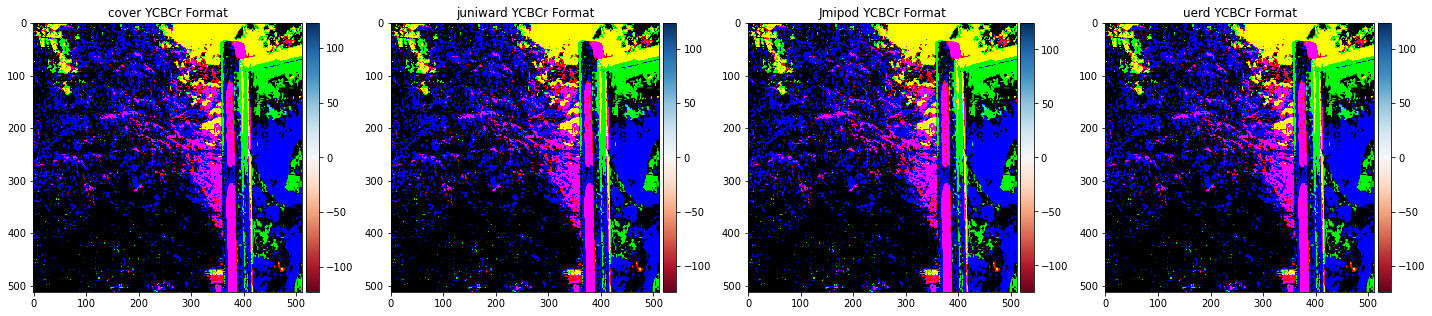

In [ ]:
# Visualizing the images with YCbCr color spaces 
fig,axes = plt.subplots(1,4,figsize=(20,20))
images=[decompimg,decompjuniward,decompjmipod,decompuerd]
title=['cover','juniward','Jmipod','uerd']
for i,ax in enumerate(axes):
    imshow(images[i],ax=ax)
    ax.set_title(title[i]+' YCBCr Format')


Still there is no difference in between different images .
Try to difference with color  spaces .

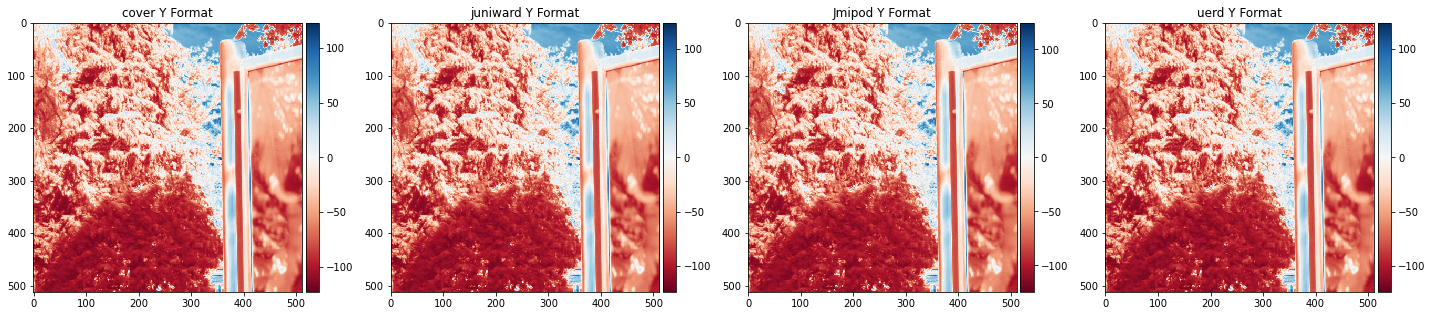

In [ ]:
# Visualizing the images with Y color spaces 
fig,axes = plt.subplots(1,4,figsize=(20,20))
images=[decompimg[:,:,0],decompjuniward[:,:,0],decompjmipod[:,:,0],decompuerd[:,:,0]]
title=['cover','juniward','Jmipod','uerd']
for i,ax in enumerate(axes):
    imshow(images[i],ax=ax)
    ax.set_title(title[i]+' Y Format')


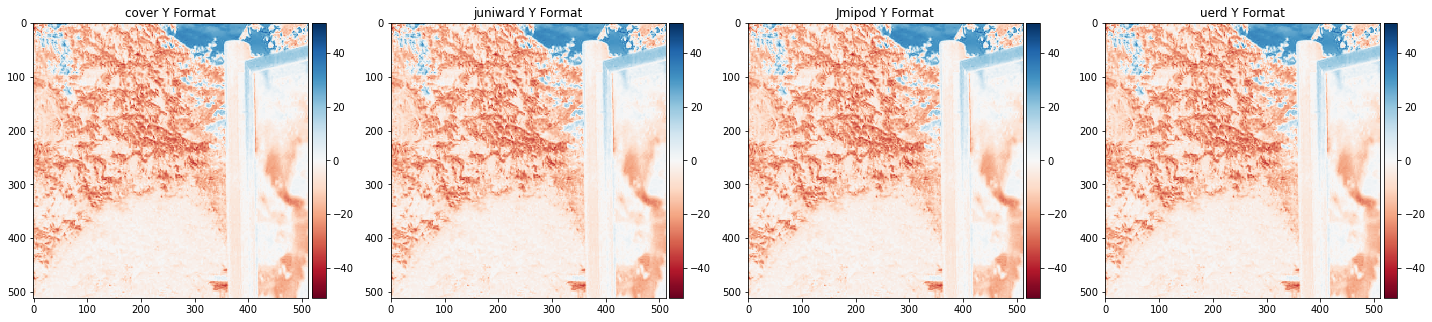

In [ ]:
# Visualizing the images with Cb color spaces 
fig,axes = plt.subplots(1,4,figsize=(20,20))
images=[decompimg[:,:,1],decompjuniward[:,:,1],decompjmipod[:,:,1],decompuerd[:,:,1]]
title=['cover','juniward','Jmipod','uerd']
for i,ax in enumerate(axes):
    imshow(images[i],ax=ax)
    ax.set_title(title[i]+' Y Format')


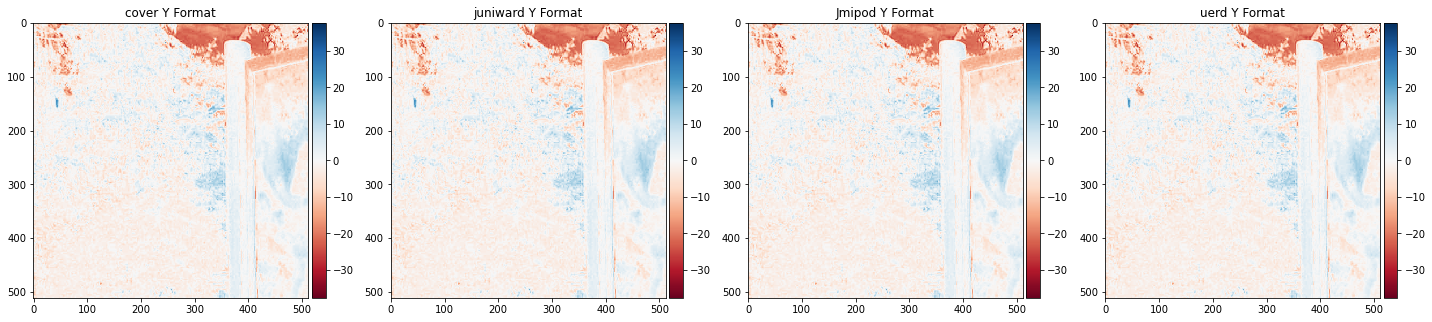

In [ ]:
# Visualizing the images with Cr color spaces 
fig,axes = plt.subplots(1,4,figsize=(20,20))
images=[decompimg[:,:,2],decompjuniward[:,:,2],decompjmipod[:,:,2],decompuerd[:,:,2]]
title=['cover','juniward','Jmipod','uerd']
for i,ax in enumerate(axes):
    imshow(images[i],ax=ax)
    ax.set_title(title[i]+' Y Format')


By visualize the different color space, There is no such difference is found.

Let's try to visualize the images with subtracting cover images with steganogrophy images

/opt/conda/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


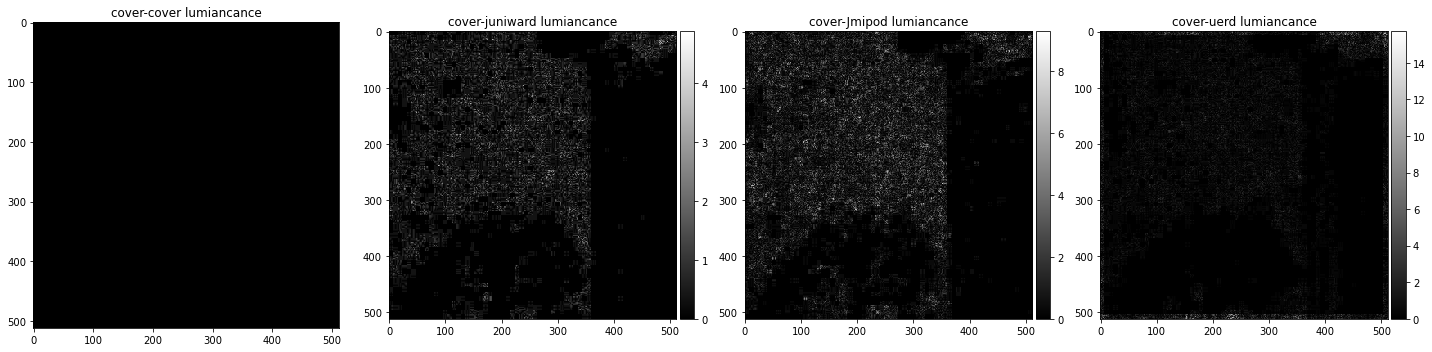

In [ ]:
# Visualizing the images by subtracting
fig,axes = plt.subplots(1,4,figsize=(20,20))
images=[decompimg[:,:,0]-decompimg[:,:,0],decompimg[:,:,0]-decompjuniward[:,:,0],decompimg[:,:,0]-decompjmipod[:,:,0],decompimg[:,:,0]-decompuerd[:,:,0]]
title=['cover-cover','cover-juniward','cover-Jmipod','cover-uerd']
for i,ax in enumerate(axes):
    imshow(abs(images[i]),ax=ax,cmap='gray')
    ax.set_title(title[i]+' lumiancance')


Lumaniance channel of images contain much differencence in images

/opt/conda/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


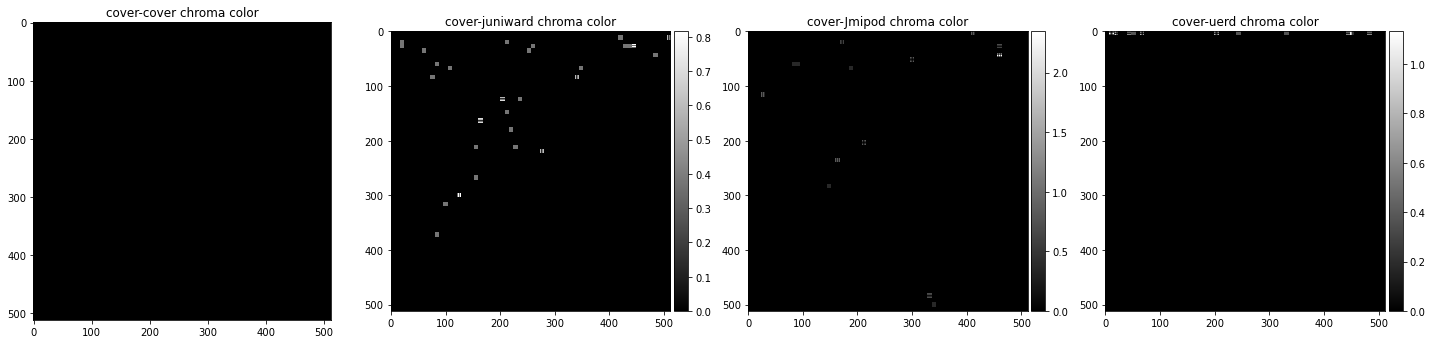

In [ ]:
# Visualizing the images by subtracting from cover images with particular color channel
fig,axes = plt.subplots(1,4,figsize=(20,20))
images=[decompimg[:,:,1]-decompimg[:,:,1],decompimg[:,:,1]-decompjuniward[:,:,1],decompimg[:,:,1]-decompjmipod[:,:,1],decompimg[:,:,1]-decompuerd[:,:,1]]
title=['cover-cover','cover-juniward','cover-Jmipod','cover-uerd']
for i,ax in enumerate(axes):
    imshow(abs(images[i]),ax=ax,cmap='gray')
    ax.set_title(title[i]+' chroma color')


By visualizing in that Stegano images doesnot steganed the chroma color space.

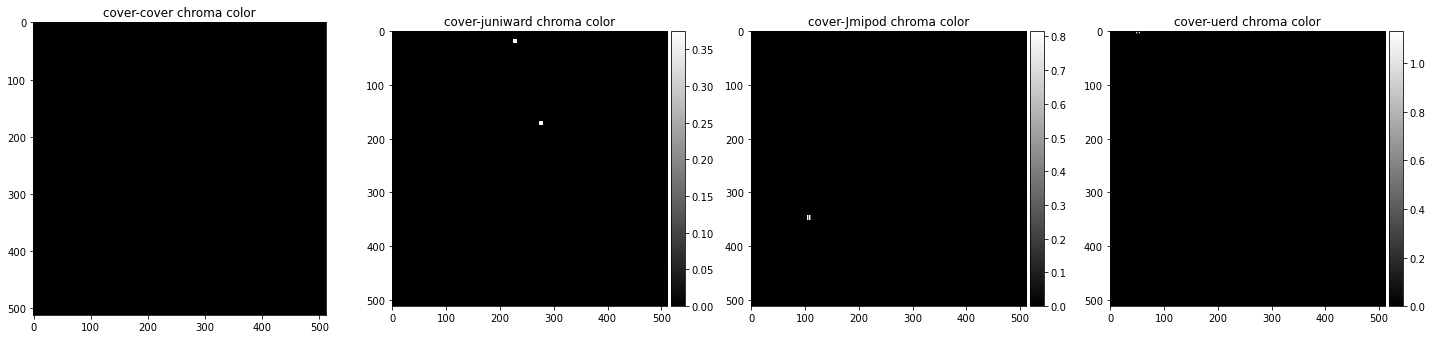

In [ ]:
# Visualizing the images by subtracting from cover images with particular color channel
fig,axes = plt.subplots(1,4,figsize=(20,20))
images=[decompimg[:,:,2]-decompimg[:,:,2],decompimg[:,:,2]-decompjuniward[:,:,2],decompimg[:,:,2]-decompjmipod[:,:,2],decompimg[:,:,2]-decompuerd[:,:,2]]
title=['cover-cover','cover-juniward','cover-Jmipod','cover-uerd']
for i,ax in enumerate(axes):
    imshow(abs(images[i]),ax=ax,cmap='gray')
    ax.set_title(title[i]+' chroma color')


**Conclusion**
From above analysis,YCbCr color spaces is analysis.We found that the by visualizing the image and different color spaces in images ,it hard to find some different in images.But in YCbCr images there is difference in information carried by each color spaces.In YCbCr lumaniances color spaces carried more information or we can say that lumaniances channel is more steganed with any other channels.

# Discrete Cosine Transform

Discrete cosine transform is used in JPEG format to compressed the images.By analysis the DCT cofficient of images,may be we find some information.

In [ ]:
import jpegio as jio
#Requirement to get Dctcoefficient of images and their quantization table

def returnDCTandquant_Table(path):
    """Return DCT of images and two quantized table one is Lumaniance and other is chromaiance"""
    c_struct=jio.read(path)
    coverDCT = np.zeros([512,512,3]) ; 
    coverDCT[:,:,0] = c_struct.coef_arrays[0] ; 
    coverDCT[:,:,1] = c_struct.coef_arrays[1] ; 
    coverDCT[:,:,2] = c_struct.coef_arrays[2]
    coverQTbl = c_struct.quant_tables[0];
    coverQTch = c_struct.quant_tables[1];
    return coverDCT,coverQTbl,coverQTch

In [ ]:
coverDct,coverqtbl,coverqtch=returnDCTandquant_Table('/kaggle/input/alaska2-image-steganalysis/Cover/00009.jpg')
juniwardDct,juniwardqtbl,juniwardqtch=returnDCTandquant_Table('/kaggle/input/alaska2-image-steganalysis/JUNIWARD/00009.jpg')
jmipodDct,jmipodqtbl,jmipodqtch=returnDCTandquant_Table('/kaggle/input/alaska2-image-steganalysis/JMiPOD/00009.jpg')
uerdDct,uerdqtbl,uerdqtch=returnDCTandquant_Table('/kaggle/input/alaska2-image-steganalysis/UERD/00009.jpg')

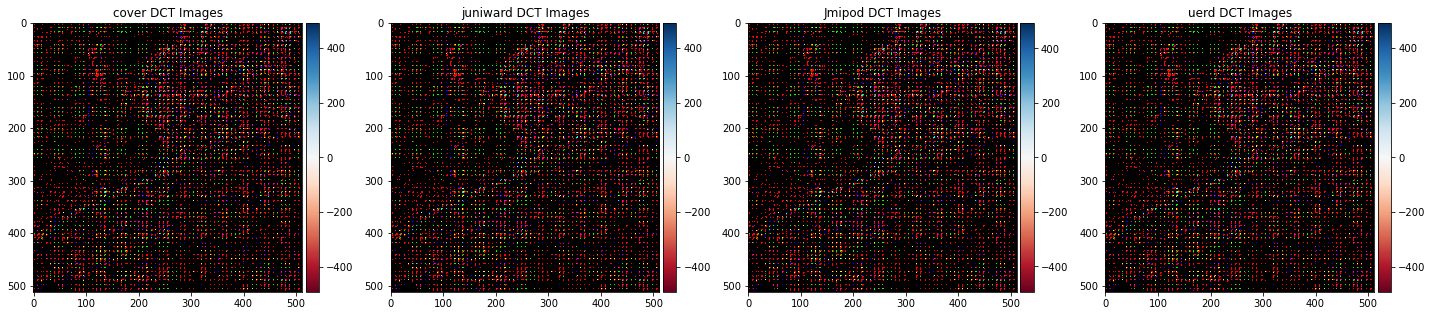

In [ ]:
# Visualizing the images with DCT
fig,axes = plt.subplots(1,4,figsize=(20,20))
images=[coverDct,juniwardDct,jmipodDct,uerdDct]
title=['cover','juniward','Jmipod','uerd']
for i,ax in enumerate(axes):
    imshow(images[i],ax=ax)
    ax.set_title(title[i]+' DCT Images')


By analysis the images with DCT cofficient,they look similiar.All the images are similiar in nature.

Let's visualize the channel difference of each DCT cofficient.

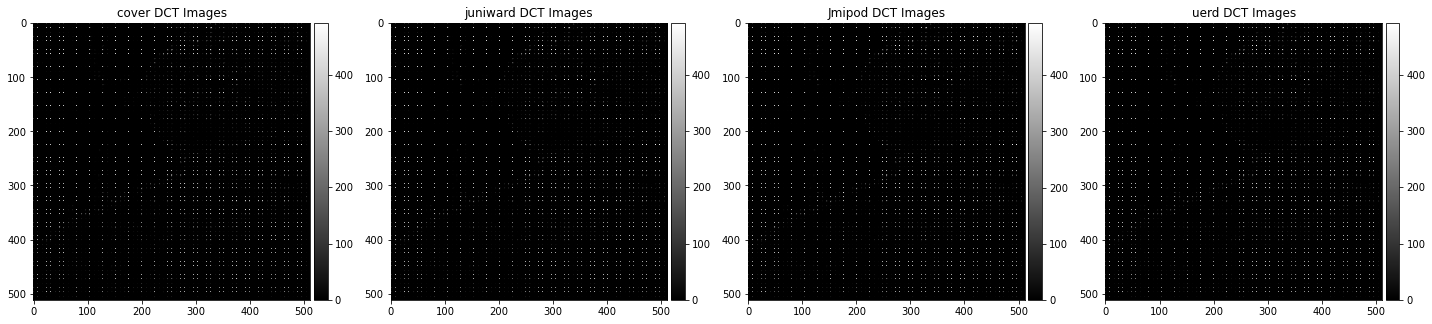

In [ ]:
# Visualizing the images with DCT spaces 
fig,axes = plt.subplots(1,4,figsize=(20,20))
images=[coverDct[:,:,0],juniwardDct[:,:,0],jmipodDct[:,:,0],uerdDct[:,:,0]]
title=['cover','juniward','Jmipod','uerd']
for i,ax in enumerate(axes):
    imshow(abs(images[i]),ax=ax,cmap='gray')
    ax.set_title(title[i]+' DCT Images')


Still,there is no difference in the channel of DCT coefficient.Let try different channels.

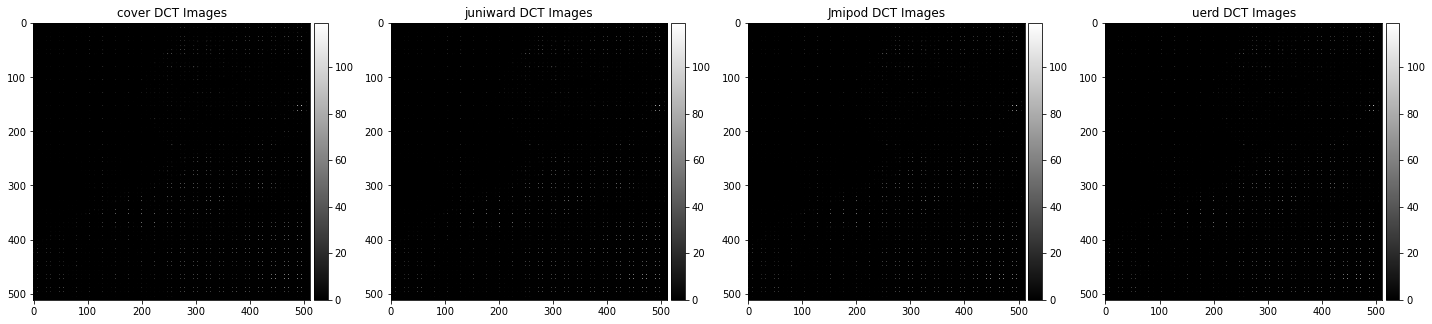

In [ ]:
# Visualizing the images with DCT spaces 
fig,axes = plt.subplots(1,4,figsize=(20,20))
images=[coverDct[:,:,1],juniwardDct[:,:,1],jmipodDct[:,:,1],uerdDct[:,:,1]]
title=['cover','juniward','Jmipod','uerd']
for i,ax in enumerate(axes):
    imshow(abs(images[i]),ax=ax,cmap='gray')
    ax.set_title(title[i]+' DCT Images')


All the images look similiar but there is difference in there range of Values.The cover images contain 0 to 45 and juniward contain 0 to 80 like this to all other images.

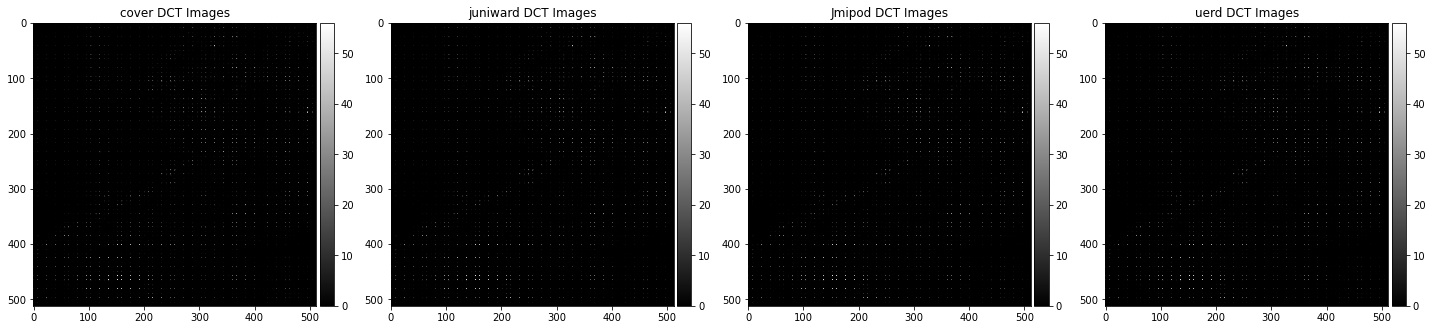

In [ ]:
# Visualizing the images with DCT color spaces 
fig,axes = plt.subplots(1,4,figsize=(20,20))
images=[coverDct[:,:,2],juniwardDct[:,:,2],jmipodDct[:,:,2],uerdDct[:,:,2]]
title=['cover','juniward','Jmipod','uerd']
for i,ax in enumerate(axes):
    imshow(abs(images[i]),ax=ax,cmap='gray')
    ax.set_title(title[i]+' DCT Images')


This channel of DCT look similiar for the different steganography images.<hr>


****Conclusion***<br>
From above observation,By visualize the image they look similiar but there is different in there range of there DCT cofficient.

# Training:

<p>There are three steganography images and one original cover image .We will generate a multiclass label data and we will convert the multiclass label data to binary model.

# Data Generation

Let first import some library that is need to solve the problem.

In [ ]:
import tensorflow as tf
import os
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))
strategy = tf.distribute.experimental.TPUStrategy(resolver)

In [ ]:
! pip install git+git://github.com/qubvel/efficientnet --upgrade

In [ ]:
import albumentations as A
from glob import glob
from sklearn.model_selection import GroupKFold
import tensorflow.keras as keras
import tensorflow.keras.layers 
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model

from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

import efficientnet.tfkeras as efn 
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow.keras.layers import *
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import Callback
import gc
from sklearn import metrics

##### Data Splitting:-
<hr>
 Groupwise data splitting is done.With 5 Fold 

In [ ]:


Cover = tf.io.gfile.glob('gs://kds-589fb266471c50cb1d79d6f44c97cf6e2e642a8ce340943df8b7ed1f/Cover/*.jpg')


dataset = []

Dir_path = 'gs://kds-589fb266471c50cb1d79d6f44c97cf6e2e642a8ce340943df8b7ed1f/'

for label, kind in enumerate(['Cover', 'JMiPOD','JUNIWARD','UERD']):
    for path in Cover:

        dataset.append({
              'Path':'/'.join((Dir_path+kind,path.split('/')[-1])),
              'image_name':path.split('/')[-1],
              'Label': label
        })

np.random.shuffle(dataset)
dataset = pd.DataFrame(dataset)

gf = GroupKFold(n_splits=5)

dataset.loc[:, 'fold'] = 0
for fold_number, (train_index, val_index) in enumerate(gf.split(X=dataset.index, y=dataset['Label'], groups=dataset['image_name'])):
    dataset.loc[dataset.iloc[val_index].index, 'fold'] = fold_number

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_data = dataset[dataset['fold']!=0].reset_index()
valdation_data = dataset[dataset['fold']==0].reset_index()
train_data_dir = train_data['Path'].values
train_data_label = train_data['Label'].values
val_data_dir = valdation_data['Path'].values
val_data_label = valdation_data['Label'].values

In [ ]:
def Mapping_training_img(image, label):
  """Return augment image and one_hot encoded label"""
  image = tf.io.read_file(image)
  image = tf.image.decode_jpeg(image, channels = 3, dct_method='INTEGER_ACCURATE')
  image = tf.cast(image,dtype = tf.float32)/255.0
  im_shape = image.shape
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_flip_up_down(image)
  label = tf.one_hot(label, 4)
  image.set_shape(im_shape)
  return image, label


def Mapping_val_img(image, label):
  """Return  image and one_hot encoded label"""
  image = tf.io.read_file(image)
  image = tf.image.decode_jpeg(image,channels=3, dct_method='INTEGER_ACCURATE')
  image = tf.cast(image,dtype = tf.float32)/255.0
  label = tf.one_hot(label, 4)
  return image, label


BATCH_SIZE = 16*strategy.num_replicas_in_sync
def prepare_for_training(ds, cache=True):
  if cache:
      if isinstance(cache, str):
          ds = ds.cache(cache)
      else:
          ds = ds.cache()
  # Repeat forever
  ds = ds.repeat()
  #ds = ds.shuffle(shuffle_buffer_size)
  ds = ds.batch(BATCH_SIZE,)
  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds


In [ ]:
# Help to take count on both images path and label
train_ds_counter = tf.data.Dataset.from_tensor_slices((train_data_dir,train_data_label))
val_ds_counter = tf.data.Dataset.from_tensor_slices((val_data_dir,val_data_label))

# Map the images path and label
train_ds_counter = train_ds_counter.map(Mapping_training_img,num_parallel_calls=AUTOTUNE)
val_ds_counter = val_ds_counter .map(Mapping_val_img,num_parallel_calls=AUTOTUNE)

# Prepare data batch and used prefech or cache for fast training
train_ds = prepare_for_training(train_ds_counter,cache = False)
val_ds = prepare_for_training(val_ds_counter,cache = True)

### Metrics

In [ ]:
def  Metrics(y,new_preds):
  """Return - Weight Auc Metric"""

        tpr_thresholds = [0.0, 0.4, 1.0]
        weights = [2, 1]
        
        fpr, tpr, thresholds = metrics.roc_curve(y,new_preds, pos_label=1)

        

        # size of subsets
        areas = np.array(tpr_thresholds[1:]) - np.array(tpr_thresholds[:-1])

        # The total area is normalized by the sum of weights such that the final weighted AUC is between 0 and 1.
        normalization = np.dot(areas, self.weights)

        competition_metric = 0
        for idx, weight in enumerate(weights):
            
            y_min = tpr_thresholds[idx]
            y_max = tpr_thresholds[idx + 1]

            mask = (y_min < tpr) & (tpr < y_max)
            # pdb.set_trace()


            x_padding = np.linspace(fpr[mask][-1], 1, 100)

            x = np.concatenate([fpr[mask], x_padding])
            y = np.concatenate([tpr[mask], [y_max] * len(x_padding)])
            y = y - y_min  # normalize such that curve starts at y=0
            score = metrics.auc(x, y)
            submetric = score * weight
            best_subscore = (y_max - y_min) * weight
            competition_metric += submetric
        return competition_metric/normalization

# Model 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras import initializers
from tensorflow.keras import models
import math
from tensorflow.keras import Input,activations

from six.moves import xrange
import tensorflow.keras.backend as k
from keras.utils.data_utils import get_file
import collections
import  tensorflow.keras.backend as K
import pickle


Using TensorFlow backend.


 # EfficientNet Architecture 
 Reference :- https://github.com/qubvel/efficientnet/blob/master/efficientnet/model.py


In [ ]:

class Swish(layers.Layer):
  """ Swish Activation """

  def __init__(self):
    super(Swish, self).__init__()
    self.supports_masking = True

  def call(self, inputs, training=None):
    return tf.nn.swish(inputs)

def round_filters(filters, width_coefficient, depth_divisor):
    """Round number of filters based on width multiplier."""

    filters *= width_coefficient
    new_filters = int(filters + depth_divisor / 2) // depth_divisor * depth_divisor
    new_filters = max(depth_divisor, new_filters)
    # Make sure that round down does not go down by more than 10%.
    if new_filters < 0.9 * filters:
        new_filters += depth_divisor
    return int(new_filters)
    
def round_repeats(repeats, depth_coefficient):
    """Round number of repeats based on depth multiplier."""
    return int(math.ceil(depth_coefficient * repeats))

In [ ]:
BlockArgs = collections.namedtuple('BlockArgs', [
    'kernel_size', 'num_repeat', 'input_filters', 'output_filters',
    'expand_ratio', 'id_skip', 'strides', 'se_ratio'
])
argument_block = [ 
BlockArgs(kernel_size=3, num_repeat=1, input_filters=32, output_filters=16, expand_ratio=1, id_skip=True, strides=[1, 1], se_ratio=0.25),
BlockArgs(kernel_size=3, num_repeat=2, input_filters=16, output_filters=24, expand_ratio=6, id_skip=True, strides=[2, 2], se_ratio=0.25),
BlockArgs(kernel_size=5, num_repeat=2, input_filters=24, output_filters=40, expand_ratio=6, id_skip=True, strides=[2, 2], se_ratio=0.25),
BlockArgs(kernel_size=3, num_repeat=3, input_filters=40, output_filters=80, expand_ratio=6, id_skip=True, strides=[2, 2], se_ratio=0.25),
BlockArgs(kernel_size=5, num_repeat=3, input_filters=80, output_filters=112, expand_ratio=6, id_skip=True, strides=[1, 1], se_ratio=0.25),
BlockArgs(kernel_size=5, num_repeat=4, input_filters=112, output_filters=192, expand_ratio=6, id_skip=True, strides=[2, 2], se_ratio=0.25),
BlockArgs(kernel_size=3, num_repeat=1, input_filters=192, output_filters=320, expand_ratio=6, id_skip=True, strides=[1, 1], se_ratio=0.25)
]

In [ ]:
def mb_conv_block(input_data, block_arg,activation,drop_rate):
  '''Mobile Inverted Residual block along with Squeeze 
    and Excitation block.'''
  kernel_size = block_arg.kernel_size
  num_repeat= block_arg.num_repeat
  input_filters= block_arg.input_filters
  output_filters= block_arg.output_filters
  expand_ratio= block_arg.expand_ratio
  id_skip= block_arg.id_skip
  strides= block_arg.strides
  se_ratio= block_arg.se_ratio
  # expansion phase
  expanded_filters =  input_filters * expand_ratio
  if expand_ratio != 1:
    x = layers.Conv2D(expanded_filters, 1,  padding='same',  use_bias=False)(input_data)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)
  else:
    x = input_data
  # Depthwise convolution phase
  x = layers.DepthwiseConv2D(kernel_size, strides,  padding='same',  use_bias=False)(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation(activation)(x)
  # Squeeze and excitation phase
  se = layers.GlobalAveragePooling2D()(x)
  se = layers.Reshape((1, 1, expanded_filters))(se)
  squeezed_filters = max (1, int(input_filters * se_ratio))
  se = layers.Conv2D(squeezed_filters , 1, activation=activation, padding='same')(se)
  se = layers.Conv2D(expanded_filters, 1, activation='sigmoid', padding='same')(se)
  x = layers.multiply([x, se])
  # Output phase
  x = layers.Conv2D(output_filters, 1, padding='same', use_bias=False)(x)
  x = layers.BatchNormalization(axis=3)(x)
  if id_skip and all(s == 1 for s in strides) and  input_filters == output_filters:
    if drop_rate and (drop_rate > 0):
        x = layers.Dropout(drop_rate,
                    noise_shape=(None, 1, 1, 1))(x)
    x = layers.add([x, input_data])
  return x

In [ ]:
def EfficientNet(width_coefficient,depth_coefficient,input_shape,drop_connect_rate=0.2,depth_divisor=8,blocks_args=argument_block):
  """Return Model
  Parameter : 
  Width_coefficient = Width_coefficient is used for adaptive filters of network .
  Depth_coefficient = It used to update filters of network
  input_shape = shape of input data
  drop_connect_rate = It is used for skip connection 
  depth_divisor = Parameter for scaling the network
  blocks_args = Argument require for the network  
  
  return :
  It will return the model 
   """
  activation = Swish()
  bn_axis = 3  #image channel last = 3 and channel-first =1
  img_input = Input(shape=(input_shape,input_shape,3))
  x = layers.Conv2D(round_filters(32, width_coefficient, depth_divisor), 3,strides=(2, 2),padding='same',use_bias=False)(img_input)
  x = layers.BatchNormalization(axis=bn_axis)(x)
  x = layers.Activation(activation)(x)
  n_block = sum(args.num_repeat  for args in blocks_args)
  block_num = 0
  for idx, block_args in enumerate(blocks_args):

    block_args = block_args._replace(
              input_filters=round_filters(block_args.input_filters,
                                          width_coefficient, depth_divisor),
              output_filters=round_filters(block_args.output_filters,
                                          width_coefficient, depth_divisor),
              num_repeat=round_repeats(block_args.num_repeat, depth_coefficient))
    drop_rate = drop_connect_rate * float(block_num) / n_block

    x = mb_conv_block(x, block_args,
                  activation=activation,
                  drop_rate=drop_rate)
    block_num += 1

    if block_args.num_repeat > 1:
        
        block_args = block_args._replace(
            input_filters=block_args.output_filters, strides=[1, 1])
        
        for _ in xrange(block_args.num_repeat - 1):
            drop_rate = drop_connect_rate * float(block_num) / n_block
            x = mb_conv_block(x, block_args,
                              activation=activation,
                              drop_rate=drop_rate)
            block_num += 1

  x = layers.Conv2D(round_filters(1280, width_coefficient, depth_divisor), 1,
          padding='same',
          use_bias=False)(x)
  x = layers.BatchNormalization(axis=bn_axis)(x)
  x = layers.Activation(activation)(x)
  model = models.Model(img_input, x)
  return model

In [ ]:
def return_resource(model_name):
  """Return parameter for specific model architecutre and it's weight"""
  resource = {
              'EfficientNetB0':[1.0, 1.0],
              'EfficientNetB1':[1.0, 1.1],
              'EfficientNetB2':[1.1, 1.2],
              'EfficientNetB3':[1.2, 1.4],
              'EfficientNetB4':[1.4, 1.8],
              'EfficientNetB5':[1.6, 2.2],
              'EfficientNetB6':[1.8, 2.6],
              'EfficientNetB7':[2.0, 3.1]
              }
  weight_url = {
              'EfficientNetB0':'https://github.com/Callidior/keras-applications/releases/download/efficientnet/efficientnet-b0_weights_tf_dim_ordering_tf_kernels_autoaugment_notop.h5',
              'EfficientNetB1':'https://github.com/Callidior/keras-applications/releases/download/efficientnet/efficientnet-b1_weights_tf_dim_ordering_tf_kernels_autoaugment_notop.h5',
              'EfficientNetB2':'https://github.com/Callidior/keras-applications/releases/download/efficientnet/efficientnet-b2_weights_tf_dim_ordering_tf_kernels_autoaugment_notop.h5',
              'EfficientNetB3':'https://github.com/Callidior/keras-applications/releases/download/efficientnet/efficientnet-b3_weights_tf_dim_ordering_tf_kernels_autoaugment_notop.h5',
              'EfficientNetB4':'https://github.com/Callidior/keras-applications/releases/download/efficientnet/efficientnet-b4_weights_tf_dim_ordering_tf_kernels_autoaugment_notop.h5',
              'EfficientNetB5':'https://github.com/Callidior/keras-applications/releases/download/efficientnet/efficientnet-b5_weights_tf_dim_ordering_tf_kernels_autoaugment_notop.h5',
              'EfficientNetB6':'https://github.com/Callidior/keras-applications/releases/download/efficientnet/efficientnet-b6_weights_tf_dim_ordering_tf_kernels_autoaugment_notop.h5',
              'EfficientNetB7':'https://github.com/Callidior/keras-applications/releases/download/efficientnet/efficientnet-b7_weights_tf_dim_ordering_tf_kernels_autoaugment_notop.h5'
              }
  weights = get_file(f'{model_name}_weight.h5',weight_url[model_name])
  return resource[model_name][0],resource[model_name][1],weights

In [ ]:
width_coefficient,depth_coefficient,weight = return_resource('EfficientNetB0')
input_resolution =512 
model = EfficientNet(width_coefficient, depth_coefficient, input_resolution)
model.load_weights(weight)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

# TRAINING

In [ ]:
def create_model():
  EffNet = efn.EfficientNetB2(weights='imagenet',include_top=False,input_shape=(512,512,3))
  for layer in EffNet.layers:
          layer.trainable = True

  x = EffNet.layers[-1].output
  x = GlobalMaxPooling2D()(x)
  predictions = Dense(4)(x)
  model = Model(inputs=EffNet.layers[0].output, outputs=predictions)
  return model

In [ ]:
class lrschedulerMonitor():
  def __init__(self,lr=0.01,loss=np.inf,patience=0):
    self.prev_loss = loss
    self.lr        = lr 
    self.patience = patience
    self.counter =  0
  def update_lr(self,loss):
    if self.prev_loss>loss:
      self.prev_loss = loss
      self.counter = 0
      return self.lr
    elif self.prev_loss<=loss:
      if self.counter>=self.patience:
        self.lr = self.lr/2
        self.counter = 0
        return self.lr
      else:
        self.counter += 1
        return self.lr


In [ ]:
#https://arxiv.org/abs/1906.02629

def Label_smoothing_loss(y_true,y_pred):
  smoothing = tf.constant(0.05)
  confidence = 1.0 - smoothing
  y_true = tf.cast(y_true,tf.float32)
  y_pred = tf.cast(y_pred,tf.float32)
  logprobs = tf.math.negative(tf.nn.log_softmax(y_pred,axis=-1))
  nll_loss = logprobs * y_true
  nll_loss = tf.math.reduce_sum(nll_loss,axis=-1)
  smooth_loss = tf.math.reduce_mean(logprobs,axis=-1)
  loss = tf.math.add(tf.math.multiply(confidence , nll_loss),tf.math.multiply(smoothing ,smooth_loss))
  return tf.reduce_mean(loss)

In [ ]:
EPOCHS = 5
STEPS_PER_EPOCH = len(train_data_dir)//(BATCH_SIZE)
VALIDATION_STEPS = len(val_data_dir)//(BATCH_SIZE)
with strategy.scope():
  model = create_model()
  lr_schedule = lrschedulerMonitor(lr = 0.0015,patience=1)
  optimizer = tfa.optimizers.AdamW(lr = 0.0015 ,weight_decay=0.0001,amsgrad=False,beta_1=0.9,beta_2=0.999)
  train_accuracy = tf.keras.metrics.AUC()
  valid_accuracy = tf.keras.metrics.AUC()
  train_loss = tf.keras.metrics.Sum()
  valid_loss = tf.keras.metrics.Sum()
  loss_fn = lambda a,b: Label_smoothing_loss(a,b)
  loss_val = lambda a,b: tf.nn.compute_average_loss(tf.nn.softmax_cross_entropy_with_logits(a,b), global_batch_size=BATCH_SIZE)
tf.compat.v1.enable_eager_execution()

31940608/31936256 [==============================] - 1s 0us/step


In [ ]:
@tf.function(experimental_compile=True)
def train_step(images, labels):
    with tf.GradientTape() as tape:
        probabilities = model(images, training=True)
        loss = loss_fn(labels, probabilities)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

            
        # update metrics
    probabilities = tf.nn.softmax(probabilities)
    train_accuracy.update_state(labels, probabilities)
    train_loss.update_state(loss)

@tf.function
def valid_step(images, labels):
    probabilities = model(images, training=False)
    loss = loss_val(labels, probabilities)
    
    # update metrics
    probabilities = tf.nn.softmax(probabilities)
    valid_accuracy.update_state(labels, probabilities)
    valid_loss.update_state(loss)

In [ ]:

import math, re, os, time
from collections import namedtuple
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 256, 256, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 256, 256, 32) 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 256, 256, 32) 0           stem_bn[0][0]                    
____________________________________________________________________________________________

In [ ]:
STEPS_PER_EPOCH = len(train_data_dir)//(BATCH_SIZE)
EPOCHS = 5
start_time = epoch_start_time = time.time()

# distribute the datset according to the strategy
train_dist_ds = strategy.experimental_distribute_dataset(train_ds)
valid_dist_ds = strategy.experimental_distribute_dataset(val_ds.take(160))

print("Steps per epoch:", STEPS_PER_EPOCH)
History = namedtuple('History', 'history')
history = History(history={'loss': [], 'val_loss': [], 'categorical_accuracy': [], 'val_categorical_accuracy': []})

epoch = 0
for step, (images, labels) in enumerate(train_dist_ds):
    
    # run training step
    strategy.experimental_run_v2(train_step, args=(images, labels))
    print(f'{step}-', end='', flush=True)

    # validation run at the end of each epoch
    if ((step+1) // STEPS_PER_EPOCH) > epoch:

        print('|', end='', flush=True)
        print("\n")
        
        # validation run
        for image, labels in valid_dist_ds:
            strategy.experimental_run_v2(valid_step, args=(image, labels))
            print('=', end='', flush=True)

        # compute metrics
        history.history['categorical_accuracy'].append(train_accuracy.result().numpy())
        history.history['val_categorical_accuracy'].append(valid_accuracy.result().numpy())
        history.history['loss'].append(train_loss.result().numpy() / STEPS_PER_EPOCH)
        history.history['val_loss'].append(valid_loss.result().numpy() / VALIDATION_STEPS)
                
        # report metrics
        epoch_time = time.time() - epoch_start_time
        print('\nEPOCH {:d}/{:d}'.format(epoch+1, EPOCHS))
        print('time: {:0.1f}s'.format(epoch_time),
              'loss: {:0.4f}'.format(history.history['loss'][-1]),
              'accuracy: {:0.4f}'.format(history.history['categorical_accuracy'][-1]),
              'val_loss: {:0.4f}'.format(history.history['val_loss'][-1]),
              'val_acc: {:0.4f}'.format(history.history['val_categorical_accuracy'][-1])
              ,'lr: {:0.4g}'.format(optimizer.lr.numpy()), flush=True)
        with open('/content/drive/My Drive/trainHistoryDict', 'wb') as file_pi:
          pickle.dump(history.history, file_pi)
        symbolic_weights = getattr(optimizer, 'weights')
        with open('/content/drive/My Drive/optimizer.pkl', 'wb') as f:
          pickle.dump(weight_values, f)
        optimizer.lr = lr_schedule.update_lr(history.history['val_loss'][-1])
        model.save_weights(f'/content/drive/My Drive/{epoch}.h5')
        
        # set up next epoch
        epoch = (step+1) // STEPS_PER_EPOCH
        epoch_start_time = time.time()

        train_accuracy.reset_states()
        valid_accuracy.reset_states()
        valid_loss.reset_states()
        train_loss.reset_states()

        
        
        if epoch >= EPOCHS:
            break
    
simple_ctl_training_time = time.time() - start_time
print("SIMPLE CTL TRAINING TIME: {:0.1f}s".format(simple_ctl_training_time))


Steps per epoch: 1875
Instructions for updating:
renamed to `run`


Instructions for updating:
renamed to `run`


0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-72-73-74-75-76-77-78-79-80-81-82-83-84-85-86-87-88-89-90-91-92-93-94-95-96-97-98-99-100-101-102-103-104-105-106-107-108-109-110-111-112-113-114-115-116-117-118-119-120-121-122-123-124-125-126-127-128-129-130-131-132-133-134-135-136-137-138-139-140-141-142-143-144-145-146-147-148-149-150-151-152-153-154-155-156-157-158-159-160-161-162-163-164-165-166-167-168-169-170-171-172-173-174-175-176-177-178-179-180-181-182-183-184-185-186-187-188-189-190-191-192-193-194-195-196-197-198-199-200-201-202-203-204-205-206-207-208-209-210-211-212-213-214-215-216-217-218-219-220-221-222-223-224-225-226-227-228-229-230-231-232-233-234-235-236-237-238-239-240-241-242-243-244-245-246-247-248-249-250-251-252-253-254-255-256-257-258-259-260-261-262-263-264-265-266-267-268-269-270-271-272-273-274-275-276-27

In [ ]:

import pickle
model.load_weights('/content/drive/My Drive/4.h5')


In [ ]:
STEPS_PER_EPOCH = len(train_data_dir)//(BATCH_SIZE)
EPOCHS = 3
start_time = epoch_start_time = time.time()

# distribute the datset according to the strategy
train_dist_ds = strategy.experimental_distribute_dataset(train_ds)
valid_dist_ds = strategy.experimental_distribute_dataset(val_ds.take(160))

print("Steps per epoch:", STEPS_PER_EPOCH)
History = namedtuple('History', 'history')
history = History(history={'loss': [], 'val_loss': [], 'categorical_accuracy': [], 'val_categorical_accuracy': []})

epoch = 0
for step, (images, labels) in enumerate(train_dist_ds):
    
    # run training step
    strategy.experimental_run_v2(train_step, args=(images, labels))
    print(f'{step}-', end='', flush=True)

    # validation run at the end of each epoch
    if ((step+1) // STEPS_PER_EPOCH) > epoch:

        print('|', end='', flush=True)
        print("\n")
        
        # validation run
        for image, labels in valid_dist_ds:
            strategy.experimental_run_v2(valid_step, args=(image, labels))
            print('=', end='', flush=True)

        # compute metrics
        history.history['categorical_accuracy'].append(train_accuracy.result().numpy())
        history.history['val_categorical_accuracy'].append(valid_accuracy.result().numpy())
        history.history['loss'].append(train_loss.result().numpy() / STEPS_PER_EPOCH)
        history.history['val_loss'].append(valid_loss.result().numpy() / VALIDATION_STEPS)
                
        # report metrics
        epoch_time = time.time() - epoch_start_time
        print('\nEPOCH {:d}/{:d}'.format(epoch+1, EPOCHS))
        print('time: {:0.1f}s'.format(epoch_time),
              'loss: {:0.4f}'.format(history.history['loss'][-1]),
              'accuracy: {:0.4f}'.format(history.history['categorical_accuracy'][-1]),
              'val_loss: {:0.4f}'.format(history.history['val_loss'][-1]),
              'val_acc: {:0.4f}'.format(history.history['val_categorical_accuracy'][-1])
              ,'lr: {:0.4g}'.format(optimizer.lr.numpy()), flush=True)
        with open('/content/drive/My Drive/trainHistoryDict', 'wb') as file_pi:
          pickle.dump(history.history, file_pi)
        symbolic_weights = getattr(optimizer, 'weights')
        with open('/content/drive/My Drive/optimizer.pkl', 'wb') as f:
          pickle.dump(weight_values, f)
        optimizer.lr = lr_schedule.update_lr(history.history['val_loss'][-1])
        model.save_weights(f'/content/drive/My Drive/model_{epoch+5}.h5')
        
        # set up next epoch
        epoch = (step+1) // STEPS_PER_EPOCH
        epoch_start_time = time.time()

        train_accuracy.reset_states()
        valid_accuracy.reset_states()
        valid_loss.reset_states()
        train_loss.reset_states()

        if epoch >= EPOCHS:
            break
    
simple_ctl_training_time = time.time() - start_time
print("SIMPLE CTL TRAINING TIME: {:0.1f}s".format(simple_ctl_training_time))


Steps per epoch: 1875
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-72-73-74-75-76-77-78-79-80-81-82-83-84-85-86-87-88-89-90-91-92-93-94-95-96-97-98-99-100-101-102-103-104-105-106-107-108-109-110-111-112-113-114-115-116-117-118-119-120-121-122-123-124-125-126-127-128-129-130-131-132-133-134-135-136-137-138-139-140-141-142-143-144-145-146-147-148-149-150-151-152-153-154-155-156-157-158-159-160-161-162-163-164-165-166-167-168-169-170-171-172-173-174-175-176-177-178-179-180-181-182-183-184-185-186-187-188-189-190-191-192-193-194-195-196-197-198-199-200-201-202-203-204-205-206-207-208-209-210-211-212-213-214-215-216-217-218-219-220-221-222-223-224-225-226-227-228-229-230-231-232-233-234-235-236-237-238-239-240-241-242-243-244-245-246-247-248-249-250-251-252-253-254-255-256-257-258-259-260-261-262-263-264-265-266-267-268-269-270-271-